Spontaneous Independence To have an effective cipher,
we need to Encrypt the same message differently each time.
Eliminate predictable patterns between blocks.

Nielson, Seth James; Monson, Christopher K..
Practical Cryptography in Python: Learning Correct Cryptography by Example (pp. 102-103).
Apress. Edição do Kindle.

In [3]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
import os

key = os.urandom(32)
iv = os.urandom(16)
aesCipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=default_backend())
aesEncryptor = aesCipher.encryptor()
aesDecryptor = aesCipher.decryptor()



Proper Padding While we are in the business of improving things, let’s introduce a better padding mechanism. The cryptography module provides two schemes, one following what is known as the **PKCS7** specification and the other following ANSI X.923. PKCS7 appends n bytes, with each padding byte holding the value n: if 3 bytes of padding are needed, it appends \x03\x03\x03. Similarly, if 2 bytes of padding are needed, it appends \x02\x02. ANSI X.923 is slightly different. All appended bytes are 0, except for the last byte, which is the length of the total padding. In this example, 3 bytes of padding is \x00\x00\x03, and two bytes of padding is \x00\x02.

Nielson, Seth James; Monson, Christopher K.. Practical Cryptography in Python: Learning Correct Cryptography by Example (pp. 108-109). Apress. Edição do Kindle.

Note that these objects also use update and finalize, since no padding is created from calling the update() method . It does, however, return full blocks, storing the rest of the bytes for either the next call to update() or the finalize() operation

Nielson, Seth James; Monson, Christopher K.. Practical Cryptography in Python: Learning Correct Cryptography by Example (p. 109). Apress. Edição do Kindle.

In [5]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import padding
import os

key = os.urandom(32)
iv = os.urandom(16)
aesCipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=default_backend())
aesEncryptor = aesCipher.encryptor()
aesDecryptor = aesCipher.decryptor()
# Make a padder/unpadder pair for 128 bit block sizes.
padder = padding.PKCS7(128).padder()
unpadder = padding.PKCS7(128).unpadder()

plaintexts = [
    b"SHORT",
    b"MEDIUM MEDIUM MEDIUM",
    b"LONG LONG LONG LONG LONG LONG",
    ]

ciphertexts = []
for m in plaintexts:
    padded_message = padder.update(m)
    ciphertexts.append(aesEncryptor.update(padded_message))

ciphertexts.append(aesEncryptor.update(padder.finalize()))

for c in ciphertexts:
    padded_message = aesDecryptor.update(c)
    print("recovered", unpadder.update(padded_message))

print("recovered", unpadder.finalize())



recovered b''
recovered b''
recovered b'SHORTMEDIUM MEDIUM MEDIUMLONG LO'
recovered b'NG LONG LONG LON'
recovered b'G LONG'


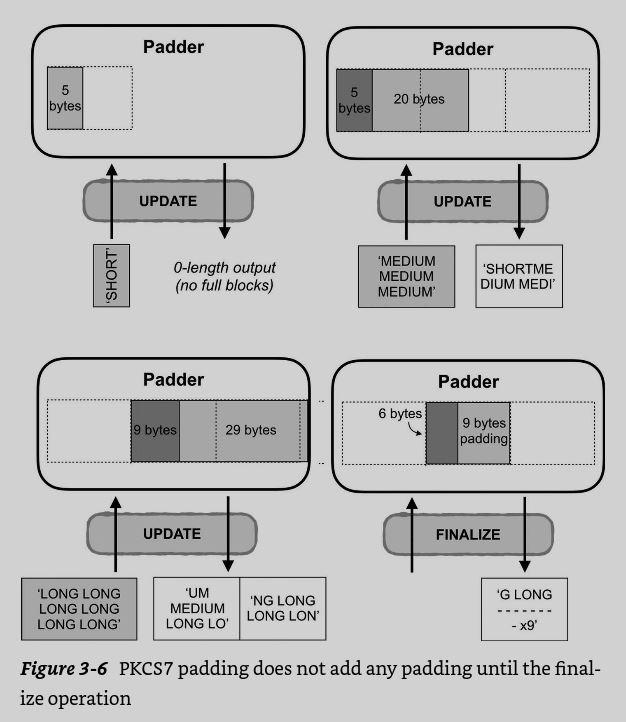